"Geo Data Science with Python" 
### Notebook Lesson 8d

# Regression

This lesson discusses examples of regression in Python.

### Sources

Brunton & Kutz, 2016 (see Syllabus for full reference), Chapter 4.

---

# Classic Curve Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 6]
rcParams.update({'font.size': 18})


### Generating synthetic data for testing regression

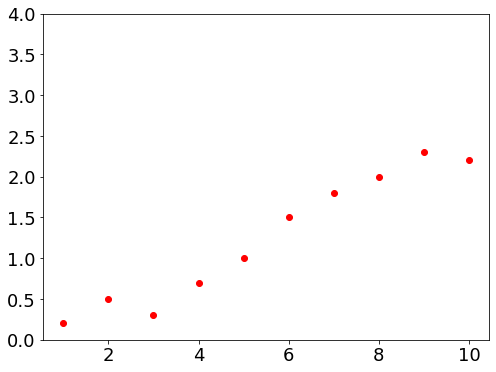

In [2]:
# Synthetic data
a = np.arange(1,11)
b = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])
t = (a,b)

plt.figure()
plt.plot(a,b,'o',color='r',linewidth=2)
plt.ylim(0,4)
plt.show()

### Using scipy.optimize to fit a line model

Defining functions to be minimized

In [3]:
# Model definitions for different L-norms

# Model for an L_inf-norm
def Linfnorm(x0,t):  
    a,b=t
    return np.max(np.abs(x0[0]*a + x0[1]-b))

# Model for an  L_1-norm
def L1norm(x0,t): 
    a,b=t
    return np.sum(np.abs(x0[0]*a + x0[1]-b))

# Model for an  L_2-norm
def L2norm(x0,t):
    a,b=t
    return np.sum(np.power(np.abs(x0[0]*a + x0[1]-b),2))

Calculating the optimization problem: estimating (inverting) the parameter. We solve this with using the `scipy.optimize` function `fmin`, which receives:
- a function, that defines the minimization problem (and is used to evaluate the model output),
- an initial guess for the parameter (`x0`), and 
- the arguments of the equation system (`a` and `b`), with `a` being the values of the equation system and `b` being the measurements.


In [4]:
x0 = np.array([1,1])
x1 = scipy.optimize.fmin(Linfnorm,x0,args=(t,));  # linear regression with 
x2 = scipy.optimize.fmin(L1norm,x0,args=(t,));
x3 = scipy.optimize.fmin(L2norm,x0,args=(t,));

Optimization terminated successfully.
         Current function value: 0.230040
         Iterations: 59
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 1.385764
         Iterations: 56
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 0.288000
         Iterations: 54
         Function evaluations: 102


Generating graphs for the model output, given estimated model parameter

In [5]:
# Estimating linear model output (b) for set of input points (a)
af = np.arange(0,11,0.1)
b1 = x1[0] * af + x1[1]  #also:  b1 = np.polyval(p1,af)
b2 = x2[0] * af + x2[1]  #also:  b2 = np.polyval(p2,af)
b3 = x3[0] * af + x3[1]  #also:  b3 = np.polyval(p3,af)

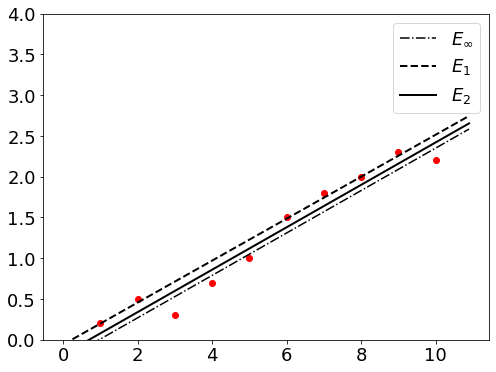

In [6]:
# Plotting results for linear models for all three norms
plt.figure()
plt.plot(a,b,'o',color='r',linewidth=2)
plt.ylim(0,4)
plt.plot(af,b1,'-.',color='k',label="$E_\infty$")
plt.plot(af,b2,'--',color='k',linewidth=2,label='$E_1$')
plt.plot(af,b3,color='k',linewidth=2,label='$E_2$')
plt.legend()
plt.show()

### Tutorial 1: Impact of Outliers on L-norms

Recalculate the regression, after inserting an outlier into the dataset (done below). Do you get a different outcome for the different norms?

In [8]:
### ADD YOUR CODE HERE

In [9]:
### ADD YOUR CODE HERE

In [10]:
### ADD YOUR CODE HERE

---
# Regression Ax = b

In [56]:
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 6]
rcParams.update({'font.size': 18})

In [57]:
# Overdetermined System
a = np.arange(1,11)
b = np.array([0.2,0.5,0.3,3.5,1.0,1.5,1.8,2.0,2.3,2.2])

a1 = np.arange(1,11)
a2 = np.ones(10)
A = np.stack((a1,a2)).T
b = np.array([0.2,0.5,0.3,0.7,1.0,1.5,1.8,2.0,2.3,2.2])

In [58]:
A

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.]])

Note: The solution for the following linear equation system is achieved by inverting A. This solution is inherently restrictive to an L2 norm and does not allow for flexibility on the choice of the L-norm.

In [59]:
xdag = np.linalg.pinv(A)@b

In [60]:
xdag

array([ 0.26, -0.18])

In [61]:
# Estimating linear model output (b) for set of input points (a)
af = np.arange(0,11,0.1)
bf = xdag[0] * af + xdag[1]  #also:  b1 = np.polyval(p1,af)


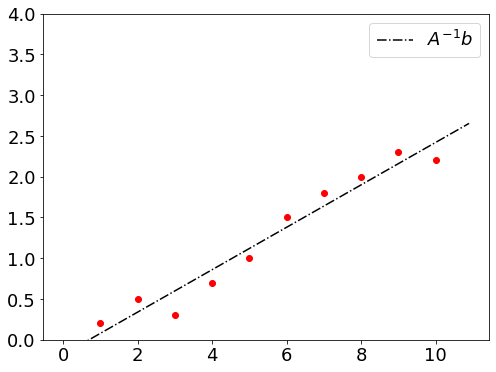

In [62]:
# Plotting results for linear models for all three norms
plt.figure()
plt.plot(a,b,'o',color='r',linewidth=2)
plt.ylim(0,4)
plt.plot(af,bf,'-.',color='k',label="$A^{-1}b$")
plt.legend()
plt.show()

## Regression Ax = b with regularization for an overdetermined system

### Enforcing a certain norm

In [63]:
def two_norm(x,A,b):
    return np.linalg.norm(A@x-b,ord=2)

def one_norm(x,A,b):
    return np.linalg.norm(A@x-b,ord=1)


res2 = scipy.optimize.minimize(two_norm,args=(A,b),x0=xdag)
res1 = scipy.optimize.minimize(one_norm,args=(A,b),x0=xdag)

res2.x
res1.x

array([ 0.2571611, -0.0571611])

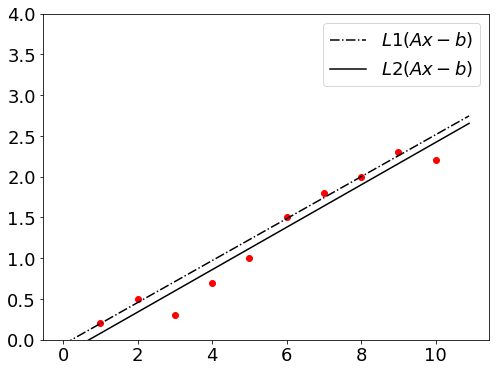

In [64]:
# Estimating linear model output (b) for set of input points (a)
af = np.arange(0,11,0.1)
bf1 = res1.x[0] * af + res1.x[1]  #also:  b1 = np.polyval(p1,af)
bf2 = res2.x[0] * af + res2.x[1]  #also:  b1 = np.polyval(p1,af)

# Plotting results for linear models for all three norms
plt.figure()
plt.plot(a,b,'o',color='r',linewidth=2)
plt.ylim(0,4)
plt.plot(af,bf1,'-.',color='k',label="$L1(Ax-b)$")
plt.plot(af,bf2,'-',color='k',label="$L2(Ax-b)$")
plt.legend()
plt.show()

### Adding penalty terms

In [65]:
lam = np.array([0, 0.1, 0.5,1])

def regularized_norm(x,A,b,lam):
    return np.linalg.norm(A@x-b,ord=2) + lam*np.linalg.norm(x,ord=1) 

for j in range(len(lam)):
    res = scipy.optimize.minimize(regularized_norm,args=(A,b,lam[j]),x0=[0,0])
    x = res.x
    print(x, np.linalg.norm(A@x-b,ord=2) )

[ 0.25999996 -0.17999981] 0.5366563146000494
[ 0.25575877 -0.15129017] 0.5383064058822552
[ 0.23702834 -0.02449954] 0.5831260009176938
[ 2.32730824e-01 -1.11868205e-08] 0.5986312493137181


In [66]:
res

      fun: 0.831362084768183
 hess_inv: array([[ 1.55656863e-03, -1.07399295e-09],
       [-1.07399295e-09,  7.45058044e-09]])
      jac: array([ 1.40070915e-06, -1.56462193e-07])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 10
     njev: 55
   status: 0
  success: True
        x: array([ 2.32730824e-01, -1.11868205e-08])

In [67]:
x

array([ 2.32730824e-01, -1.11868205e-08])

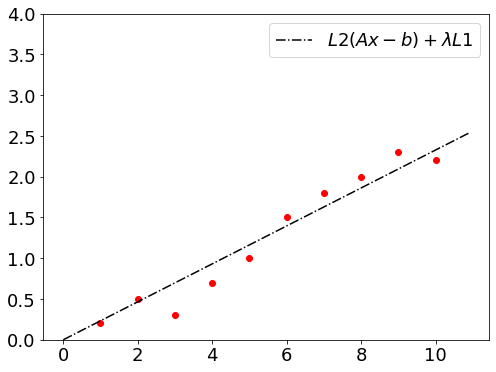

In [70]:
# Estimating linear model output (b) for set of input points (a)
af = np.arange(0,11,0.1)
bf = x[0] * af + x[1]  #also:  b1 = np.polyval(p1,af)

# Plotting results for linear models for all three norms
plt.figure()
plt.plot(a,b,'o',color='r',linewidth=2)
plt.ylim(0,4)
plt.plot(af,bf,'-.',color='k',label="$L2(Ax-b)+\lambda L1$")
plt.legend()
plt.show()

---
# Estimating global mean temperature trend

### Getting global mean temperature from GIS TEMP

In [73]:
'Import packages'
%reset -f 
import numpy as np
import matplotlib.pyplot as plt
import requests
from netCDF4 import Dataset

In [74]:
'Download the gistemp dataset'

# Define the URL
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz'
filename = 'gistemp250_GHCNv4.nc.gz'

# Use requests.get() to download the data behind that URL
r = requests.get(url, allow_redirects=True, stream=True)  
# Write the file to a new file on your computer
open(filename, 'wb').write(r.content)  #the previous two in one line
# Unzip the file: bash command
!gunzip -f -k {filename} # unpacks the file


In [75]:
'Read the gistemp dataset'

data = Dataset('gistemp250_GHCNv4.nc')

fillVal = data.variables['tempanomaly']._FillValue
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
time = data.variables['time'][:].data
timeUnit = data.variables['time'].units

# retrieve data for all time steps, set empty values to nan
anomAll = data.variables['tempanomaly'][:].data
anomAll[anomAll==fillVal] = np.nan
anomAll_NH = anomAll[:,45:-1,:].copy() # data for northern hemisphere only
data.close()

<ipython-input-75-a95aa4a3d27a>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = data.variables['lat'][:].data
<ipython-input-75-a95aa4a3d27a>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = data.variables['lon'][:].data
<ipython-input-75-a95aa4a3d27a>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To si

In [76]:
'Convert the time vector to dates'

from datetime import datetime, timedelta
time_date = [ datetime(1800, 1, 1) + timedelta(float(date)) for date in time ]


In [77]:
'Estimating global mean for each time step in the dataset'

# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(time)    

# creating a numpy array of the same length, containing zeros
monthlyMeanAnom = np.zeros(NoOfMonths) 

# Estimating the global mean for each time step, by averaging over axis 1 and 2 in anomAll          
# using nanmean to make sure nan values are ignored
monthlyMeanAnom = np.nanmean(anomAll,axis = (1,2))
monthlyMeanAnom_NH =  np.nanmean(anomAll_NH,axis = (1,2))

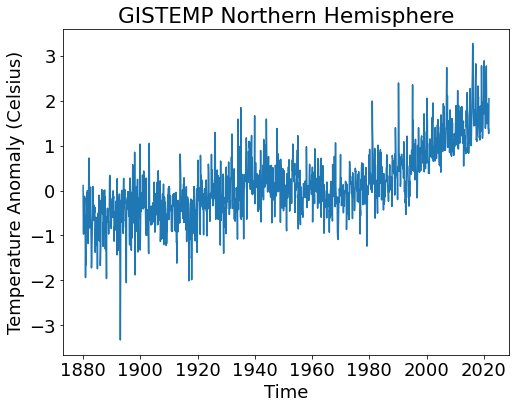

In [78]:
'Plotting time series'

# plotting the time series of mean 'tos' (over the entire globe)
plt.plot(time_date,monthlyMeanAnom_NH)

# adding labels
plt.title("GISTEMP Northern Hemisphere")
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (Celsius)')
plt.show()

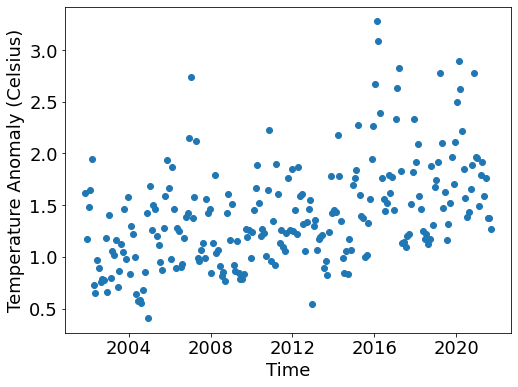

In [79]:
'Plotting time series for shorter period'
# (set timeMin and timeMax accordingly)
timeMin = -12*20   # get records *(monthly) for last 20 years
timeMax = -1
time_short = time[timeMin:timeMax]
time_date_short = time_date[timeMin:timeMax]
monthlyMeanAnom_NH_short = monthlyMeanAnom_NH[timeMin:timeMax]
plt.scatter(time_date_short,monthlyMeanAnom_NH_short)
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (Celsius)')
plt.show()

Now we want to use this time series for a regression analysis.

## Temperature increase: linear model (tutorial 2)

In [80]:
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 6]
rcParams.update({'font.size': 18})

In [81]:
# Building the Equation System

# using only the short time series
t = time_short - time_short[0]
a1 = np.ones(len(t))
a2 = t
A = np.stack((a1,a2)).T
b = monthlyMeanAnom_NH_short
time_date_use = time_date_short


In [82]:

### ADD CODE HERE TO INVERT THE LINEAR MODEL


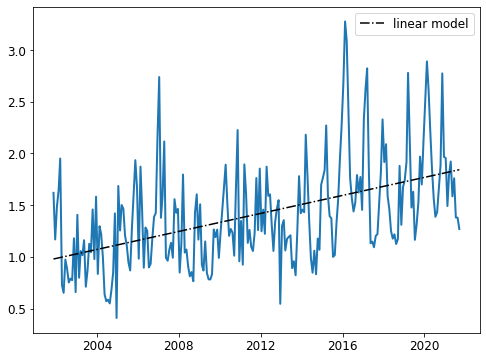

In [132]:
# Estimating linear model output (b) for set of input points (a)
bf = x[0]  + x[1]* a2    #also:  b1 = np.polyval(xdag,a1)

# Plotting results for linear model
plt.figure()
plt.plot(time_date_use,b,linewidth=2)
plt.plot(time_date_use,bf,'-.',color='k',label="linear model")
plt.legend()
plt.show()


In [ ]:
print("Average temperature increase is: " + str(round(x[1]*365,2)) + " degree celsius per year")

## Global mean temperature acceleration: cubic polynomial model

In [84]:
import scipy.optimize
from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 6]
rcParams.update({'font.size': 12})

In [85]:
# Building the Equation System

# using only the short time series
t = time_short - time_short[0]
a1 = np.ones(len(t))
a2 = t
a3 = np.square(t)
A = np.stack((a1,a2,a3)).T
b = monthlyMeanAnom_NH_short
time_date_use = time_date_short


In [86]:
x = np.linalg.pinv(A)@b
x

array([1.06674354e+00, 5.67870315e-05, 8.03145174e-09])

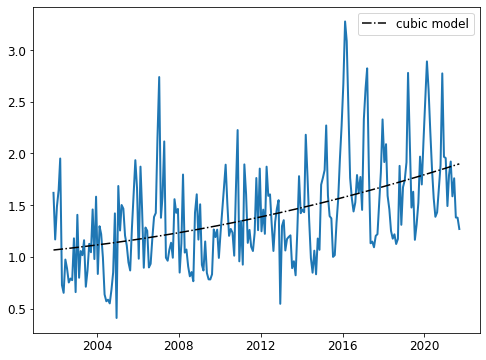

In [87]:
# Estimating linear model output (b) for set of input points (a)
bf = x[0]  + x[1]* a2  + x[2]* a3   #also:  b1 = np.polyval(xdag,a1)

# Plotting results for cubic model
plt.figure()
plt.plot(time_date_use,b,linewidth=2)
plt.plot(time_date_use,bf,'-.',color='k',label="cubic model")
plt.legend()
plt.show()


In [88]:
print("Acceleration of the temperature increase: " + str(round(x[2]*365*365*100,5)) + " degree celsius per 10 year^2")

Acceleration of the temperature increase: 0.107 degree celsius per 10 year^2


## Annual variation in temperature changes: periodic model

In [133]:
# Building the Equation System

# using only the short time series
t = time_short - time_short[0]
a1 = np.ones(len(t))
a2 = t
a3 = np.sin(t*2*np.pi/365)
a4 = np.cos(t*2*np.pi/365)
a5 = t*t
A = np.stack((a1,a2,a3,a4,a5)).T
b = monthlyMeanAnom_NH_short
time_date_use = time_date_short


In [134]:
x = np.linalg.pinv(A)@b
x

array([1.04855753e+00, 6.20101860e-05, 3.24660985e-01, 7.72651150e-02,
       7.89314456e-09])

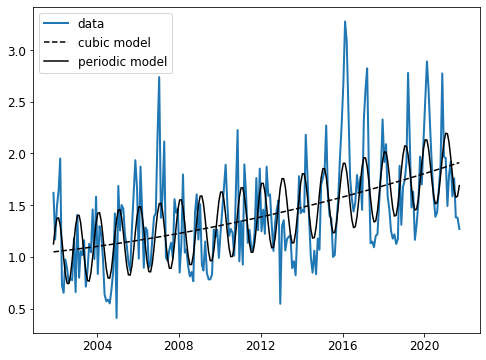

In [141]:
# Estimating linear model output (b) for set of input points (a)
bf = x[0]  + x[1]* t  + x[2] * np.sin(t*2*np.pi/365) +  x[3] * np.cos(t*2*np.pi/365)  + x[4]* t*t
bf2 = x[0]  + x[1]* t  + x[4]* t*t

# Plotting results for periodic model
plt.figure()
plt.plot(time_date_use,b,linewidth=2,label="data")
plt.plot(time_date_use,bf2,'--',color='k',label="cubic model")
plt.plot(time_date_use,bf,'-',color='k',label="periodic model")
plt.legend()
plt.show()


## Predicting annual variation in temperature changes: periodic model

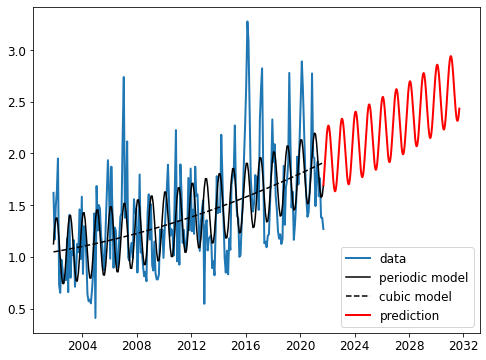

In [142]:
# Estimating linear model output (b) for set of input points (a)
t_future = t[-1] +  np.arange(1,365*10,1)  # added 10 years to time vector for prediction
bf_future = x[0]  + x[1]* t_future  + x[2] * np.sin(t_future*2*np.pi/365) +  x[3] * np.cos(t_future*2*np.pi/365) + x[4]* t_future * t_future
time_date_future = [ time_date_short[0]  + timedelta(float(date)) for date in t_future ]

# Plotting results for prediction
plt.figure()
plt.plot(time_date_use,b,linewidth=2,label="data")
plt.plot(time_date_use,bf,'-',color='k',label="periodic model")
plt.plot(time_date_use,bf2,'--',color='k',label="cubic model")
plt.plot(time_date_future,bf_future,'-',color='r',linewidth=2,label="prediction")
plt.legend()
plt.show()